In [1]:
import awkward as ak
import hist
import numpy as np
import pylhe
from mt2 import mt2
import os
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp

In [2]:
import seaborn as sns
colors = sns.color_palette("colorblind", 8)

In [3]:
lumi = 139*1e3 #fb

# General functions

In [4]:
def read_sigma_nevents(dirname):
    filename = dirname + dirname.split('/')[-2]+'_tag_1_banner.txt'
    with open(filename,'r') as f:
        data = f.readlines()
    f.close()
    sigma = float(data[-4].split(' ')[-1])
    nevents = float(data[-5].split(' ')[-1])
    return sigma, nevents

In [5]:
def mt2_ttbar(arr):
    
    vecL1 = arr.particles.vector[:,-5]   
    vecL2 = arr.particles.vector[:,-2] 
        
    vecB1 = arr.particles.vector[:,-6]   
    vecB2 = arr.particles.vector[:,-3]
        
    massL1 = 0.1 # assume masses for the leptons
    massL2 = 0.1

    pxL1 = vecL1.px
    pyL1 = vecL1.py

    pxL2 = vecL2.px
    pyL2 = vecL2.py
    
    vecMiss = -(vecL1 + vecL2 + vecB1 + vecB2)

    pmiss_x = vecMiss.px
    pmiss_y = vecMiss.py

    mmiss1 = 0 # masses of the neutrinos or other invisible components, set to zero
    mmiss2 = 0
    
    val = mt2(
    massL1, pxL1, pyL1,  # Visible 1: mass, px, py
    massL2, pxL2, pyL2,  # Visible 2: mass, px, py
    pmiss_x, pmiss_y,  # Missing transverse momentum: x, y
    mmiss1, mmiss2)  # Invisible 1 mass, invisible 2 mass

    return val

In [6]:
def calculate_mt2(dirname):
    
    sigma, nevents = read_sigma_nevents(dirname)
    ww = sigma*lumi/nevents
    
    pylhe.register_awkward()
    filename = dirname + 'unweighted_events.lhe.gz'
    arr = pylhe.to_awkward(pylhe.read_lhe_with_attributes(filename))
    val = mt2_ttbar(arr)
    
    return (val, ww)

In [7]:
def generate_histogram(val, ww):

    axis0 = hist.axis.Regular(bins=num_bins, start=min_bins, stop=max_bins, name="mt2");
    hist0 = hist.Hist(axis0);
    hist0.fill(mt2=val, weight=ww);
    
    return hist0

## Correct momenta assignment

In [8]:
dir_ttbar_off_df_1 = os.path.expanduser('~/Documents/MadGraph/ppttleptonic_offshell_df/Events/run_12/')
dir_ttbar_off_df_2 = os.path.expanduser('~/Documents/MadGraph/ppttleptonic_offshell_df/Events/run_13/')
dir_ttbar_off_df_3 = os.path.expanduser('~/Documents/MadGraph/ppttleptonic_offshell_df/Events/run_14/')
dir_ttbar_off_df_4 = os.path.expanduser('~/Documents/MadGraph/ppttleptonic_offshell_df/Events/run_15/')
dir_ttbar_off_df_5 = os.path.expanduser('~/Documents/MadGraph/ppttleptonic_offshell_df/Events/run_16/')
dir_ttbar_off_df_6 = os.path.expanduser('~/Documents/MadGraph/ppttleptonic_offshell_df/Events/run_17/')
dir_ttbar_off_df_7 = os.path.expanduser('~/Documents/MadGraph/ppttleptonic_offshell_df/Events/run_18/')
dir_ttbar_off_df_8 = os.path.expanduser('~/Documents/MadGraph/ppttleptonic_offshell_df/Events/run_19/')
dir_ttbar_off_df_9 = os.path.expanduser('~/Documents/MadGraph/ppttleptonic_offshell_df/Events/run_20/')
dir_ttbar_off_df_10 = os.path.expanduser('~/Documents/MadGraph/ppttleptonic_offshell_df/Events/run_21/')

In [9]:
sigma_1 = read_sigma_nevents(dir_ttbar_off_df_1)[0]
sigma_2 = read_sigma_nevents(dir_ttbar_off_df_2)[0]
sigma_3 = read_sigma_nevents(dir_ttbar_off_df_3)[0]
sigma_4 = read_sigma_nevents(dir_ttbar_off_df_4)[0]
sigma_5 = read_sigma_nevents(dir_ttbar_off_df_5)[0]
sigma_6 = read_sigma_nevents(dir_ttbar_off_df_6)[0]
sigma_7 = read_sigma_nevents(dir_ttbar_off_df_7)[0]
sigma_8 = read_sigma_nevents(dir_ttbar_off_df_8)[0]
sigma_9 = read_sigma_nevents(dir_ttbar_off_df_9)[0]
sigma_10 = read_sigma_nevents(dir_ttbar_off_df_10)[0]

In [10]:
sigma_tot = sigma_1 + sigma_2 + sigma_3 + sigma_4 + sigma_5 + sigma_6 + sigma_7 + sigma_8 + sigma_9 + sigma_10

In [11]:
Nbatch = 10.

In [12]:
print(sigma_1)
print(sigma_2)
print(sigma_tot)

5.526529999999999
5.525370000000001
55.2201


In [13]:
mt2_01, ww_01 = calculate_mt2(dir_ttbar_off_df_1)

/var/folders/d0/vjgg68h93_q2fcyzx7cftx_h0000gn/T/ipykernel_37439/834288396.py:6: DeprecationWarning: pylhe.awkward.register_awkward is deprecated as of pylhe v0.6.0 and will be removed in pylhe v0.8.0. Please remove use of pylhe.awkward.register_awkward in favor of automatic registration.
  pylhe.register_awkward()


In [14]:
mt2_02, ww_02 = calculate_mt2(dir_ttbar_off_df_2)
mt2_03, ww_03 = calculate_mt2(dir_ttbar_off_df_3)
mt2_04, ww_04 = calculate_mt2(dir_ttbar_off_df_4)
mt2_05, ww_05 = calculate_mt2(dir_ttbar_off_df_5)
mt2_06, ww_06 = calculate_mt2(dir_ttbar_off_df_6)
mt2_07, ww_07 = calculate_mt2(dir_ttbar_off_df_7)
mt2_08, ww_08 = calculate_mt2(dir_ttbar_off_df_8)
mt2_09, ww_09 = calculate_mt2(dir_ttbar_off_df_9)
mt2_10, ww_10 = calculate_mt2(dir_ttbar_off_df_10)

/var/folders/d0/vjgg68h93_q2fcyzx7cftx_h0000gn/T/ipykernel_37439/834288396.py:6: DeprecationWarning: pylhe.awkward.register_awkward is deprecated as of pylhe v0.6.0 and will be removed in pylhe v0.8.0. Please remove use of pylhe.awkward.register_awkward in favor of automatic registration.
  pylhe.register_awkward()


In [15]:
axis_new = hist.axis.Variable([100.0,110.0, 120.0, 140.0], name="mt2");
hist_new = hist.Hist(axis_new);
hist_new.fill(mt2=mt2_01, weight=ww_01/Nbatch);
hist_new.fill(mt2=mt2_02, weight=ww_02/Nbatch);
hist_new.fill(mt2=mt2_03, weight=ww_03/Nbatch);
hist_new.fill(mt2=mt2_04, weight=ww_04/Nbatch);
hist_new.fill(mt2=mt2_05, weight=ww_05/Nbatch);
hist_new.fill(mt2=mt2_06, weight=ww_06/Nbatch);
hist_new.fill(mt2=mt2_07, weight=ww_07/Nbatch);
hist_new.fill(mt2=mt2_08, weight=ww_08/Nbatch);
hist_new.fill(mt2=mt2_09, weight=ww_09/Nbatch);
hist_new.fill(mt2=mt2_10, weight=ww_10/Nbatch);

In [17]:
axis_new_no_norm = hist.axis.Variable([100.0,110.0, 120.0, 140.0], name="mt2");
hist_new_no_norm = hist.Hist(axis_new_no_norm);
hist_new_no_norm.fill(mt2=mt2_01, weight=1.0);
hist_new_no_norm.fill(mt2=mt2_02, weight=1.0);
hist_new_no_norm.fill(mt2=mt2_03, weight=1.0);
hist_new_no_norm.fill(mt2=mt2_04, weight=1.0);
hist_new_no_norm.fill(mt2=mt2_05, weight=1.0);
hist_new_no_norm.fill(mt2=mt2_06, weight=1.0);
hist_new_no_norm.fill(mt2=mt2_07, weight=1.0);
hist_new_no_norm.fill(mt2=mt2_08, weight=1.0);
hist_new_no_norm.fill(mt2=mt2_09, weight=1.0);
hist_new_no_norm.fill(mt2=mt2_10, weight=1.0);

In [18]:
width = 0.05
bincenters = [105,115,130]

In [19]:
atlas_bins = [100.0,110.0, 120.0, 140.0]

In [24]:
binheight_atlas = unp.uarray([44.4,17.3,10.0], [5.8, 4.2, 3.1])

In [27]:
# get the binheight from the distributions normalised with the total cross section
# get the Nbin from the distribution with no normalisation

binheight_new = np.zeros(3)
Nbin_new = np.zeros(3)
y_err_new = np.zeros(3)
    
for i in range(3):
    binheight_new[i] = hist_new[i]
    Nbin_new[i] = hist_new_no_norm[i]
    
    if Nbin_new[i] > 0:
        y_err_new[i] = binheight_new[i]/np.sqrt(Nbin_new[i])

In [28]:
print(binheight_new)

[92.87017286 28.40311961  6.1368222 ]


In [30]:
print(binheight_new)
print(y_err_new)

[92.87017286 28.40311961  6.1368222 ]
[8.44274299 4.6694441  2.1696943 ]


In [31]:
binheight_mg_new = unp.uarray(binheight_new, y_err_new)

In [32]:
binheight_atlas = unp.uarray([44.4,17.3,10.0], [5.8, 4.2, 3.1])

In [33]:
Kfactor_new = binheight_atlas/binheight_mg_new

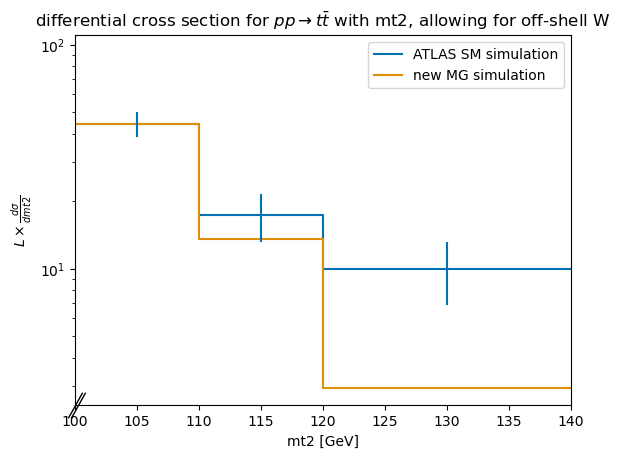

In [35]:
atlas_sm_plot = np.concatenate([unp.nominal_values(binheight_atlas), [unp.nominal_values(binheight_atlas)[-1]]])
binheight_new_plot = np.concatenate([binheight_new, [binheight_new[-1]]])*unp.nominal_values(Kfactor_new)[0]
#binheight_old_plot = np.concatenate([binheight_old, [binheight_old[-1]]])*unp.nominal_values(Kfactor_old)[0]

artists = hist_new.plot1d(color = 'none');
#plt.bar(bincenters, binheight_new, width=width, color='none', yerr=y_err_new, log = True)
ax = artists[0].stairs.axes;

ax.step(atlas_bins, atlas_sm_plot, where='post',label='ATLAS SM simulation', color=colors[0])
ax.step(atlas_bins, binheight_new_plot, where='post', label = 'new MG simulation', color = colors[1])
plt.bar(bincenters, unp.nominal_values(binheight_atlas), width=width, color='none', yerr=unp.std_devs(binheight_atlas), log = True, error_kw=dict(ecolor=colors[0]))

ax = artists[0].stairs.axes;
ax.set_yscale("log");
ax.set_xlim(100,140)
ax.set_xlabel("mt2 [GeV]");
ax.set_ylabel(r"$L \times \frac{d\sigma}{d mt2}$");
ax.set_title(r'differential cross section for $ p p \rightarrow t \bar{t}$ with mt2, allowing for off-shell W');
ax.legend()


plt.rc('axes', labelsize=20)
#plt.savefig("./plots/ttbar_df_old_new_comparison.png")

In [36]:
print("K-factor first bin with both uncertainties: ", f"{Kfactor_new[0]:.4f}")
#print("K-factor first bin with only MG uncertainties: ", f"{Kfactor_only_MG[0]:.4f}")
#print("K-factor first bin with only ATALS uncertainties: ", f"{Kfactor_only_ATLAS[0]:.4f}")

K-factor first bin with both uncertainties:  0.4781+/-0.0761


Text(0.5, 1.0, 'K-factor in 3 bins, ATLAS events/ MG events, no cuts')

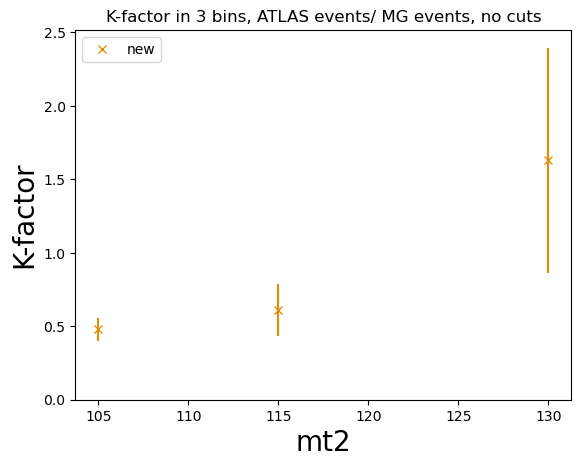

In [38]:
plt.figure()
plt.plot(bincenters, unp.nominal_values(Kfactor_new), 'x', color = colors[1], label = 'new')
plt.bar(bincenters, unp.nominal_values(Kfactor_new), width=width, color='none', yerr=unp.std_devs(Kfactor_new), log = False, error_kw=dict(ecolor=colors[1]))
plt.xlabel("mt2")
plt.ylabel("K-factor")
plt.legend(loc = 2)
plt.title("K-factor in 3 bins, ATLAS events/ MG events, no cuts")
#plt.savefig("./plots/ttbar_df_k_factor_comparison.png")